In [1]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from scripts import constants

In [2]:
def format_dataset_name(name):
    if name == "zheng_2017":
        formatted_name = "Zheng et al. 2017"
    elif name == "haber_2017":
        formatted_name = "Haber et al. 2017"
    elif name == "mcfarland_2020":
        formatted_name = "McFarland et al. 2020"
    else:
        formatted_name = name
    return formatted_name

def format_method_name(name):
    if "_" in name:
        split_name = name.split("_")
        formatted_name = f"{split_name[0]} ({split_name[1]})"
    else:
        formatted_name = name
    return formatted_name

In [3]:
latent_size_list = [2, 10]

In [4]:
recon_df = pd.read_csv(
    os.path.join(
        constants.DEFAULT_RESULTS_PATH,
        "reconstruction_performance_summary.csv",
    ),
)
inactivity_df = pd.read_csv(
    os.path.join(
        constants.DEFAULT_RESULTS_PATH,
        "latent_inactivity_summary.csv",
    ),
)

In [5]:
datasets = [
    "Zheng et al. 2017",
    "Haber et al. 2017",
    "McFarland et al. 2020",
]
recon_df["dataset"] = pd.Categorical(
    recon_df["dataset"].map(format_dataset_name),
    datasets,
)
inactivity_df["dataset"] = pd.Categorical(
    inactivity_df["dataset"].map(format_dataset_name),
    datasets,
)

recon_df["method"] = recon_df["method"].map(format_method_name)
inactivity_df["method"] = inactivity_df["method"].map(format_method_name)

In [6]:
inactivity_df["cv"] = np.sqrt(inactivity_df["variance"]) / np.abs(inactivity_df["mean"])
inactivity_metric_vars = ["variance", "mean", "median", "cv"]
inactivity_other_vars = [col for col in inactivity_df.columns if col not in inactivity_metric_vars]
melted_inactivity_df = (
    inactivity_df
    .melt(id_vars=inactivity_other_vars, value_vars=inactivity_metric_vars)
    .rename(columns={"variable": "metric"})
)

In [7]:
recon_metric_vars = ["r2", "explained_variance", "pearson"]
recon_other_vars = [col for col in recon_df.columns if col not in recon_metric_vars]
melted_recon_df = (
    recon_df
    .melt(id_vars=recon_other_vars, value_vars=recon_metric_vars)
    .rename(columns={"variable": "metric"})
)

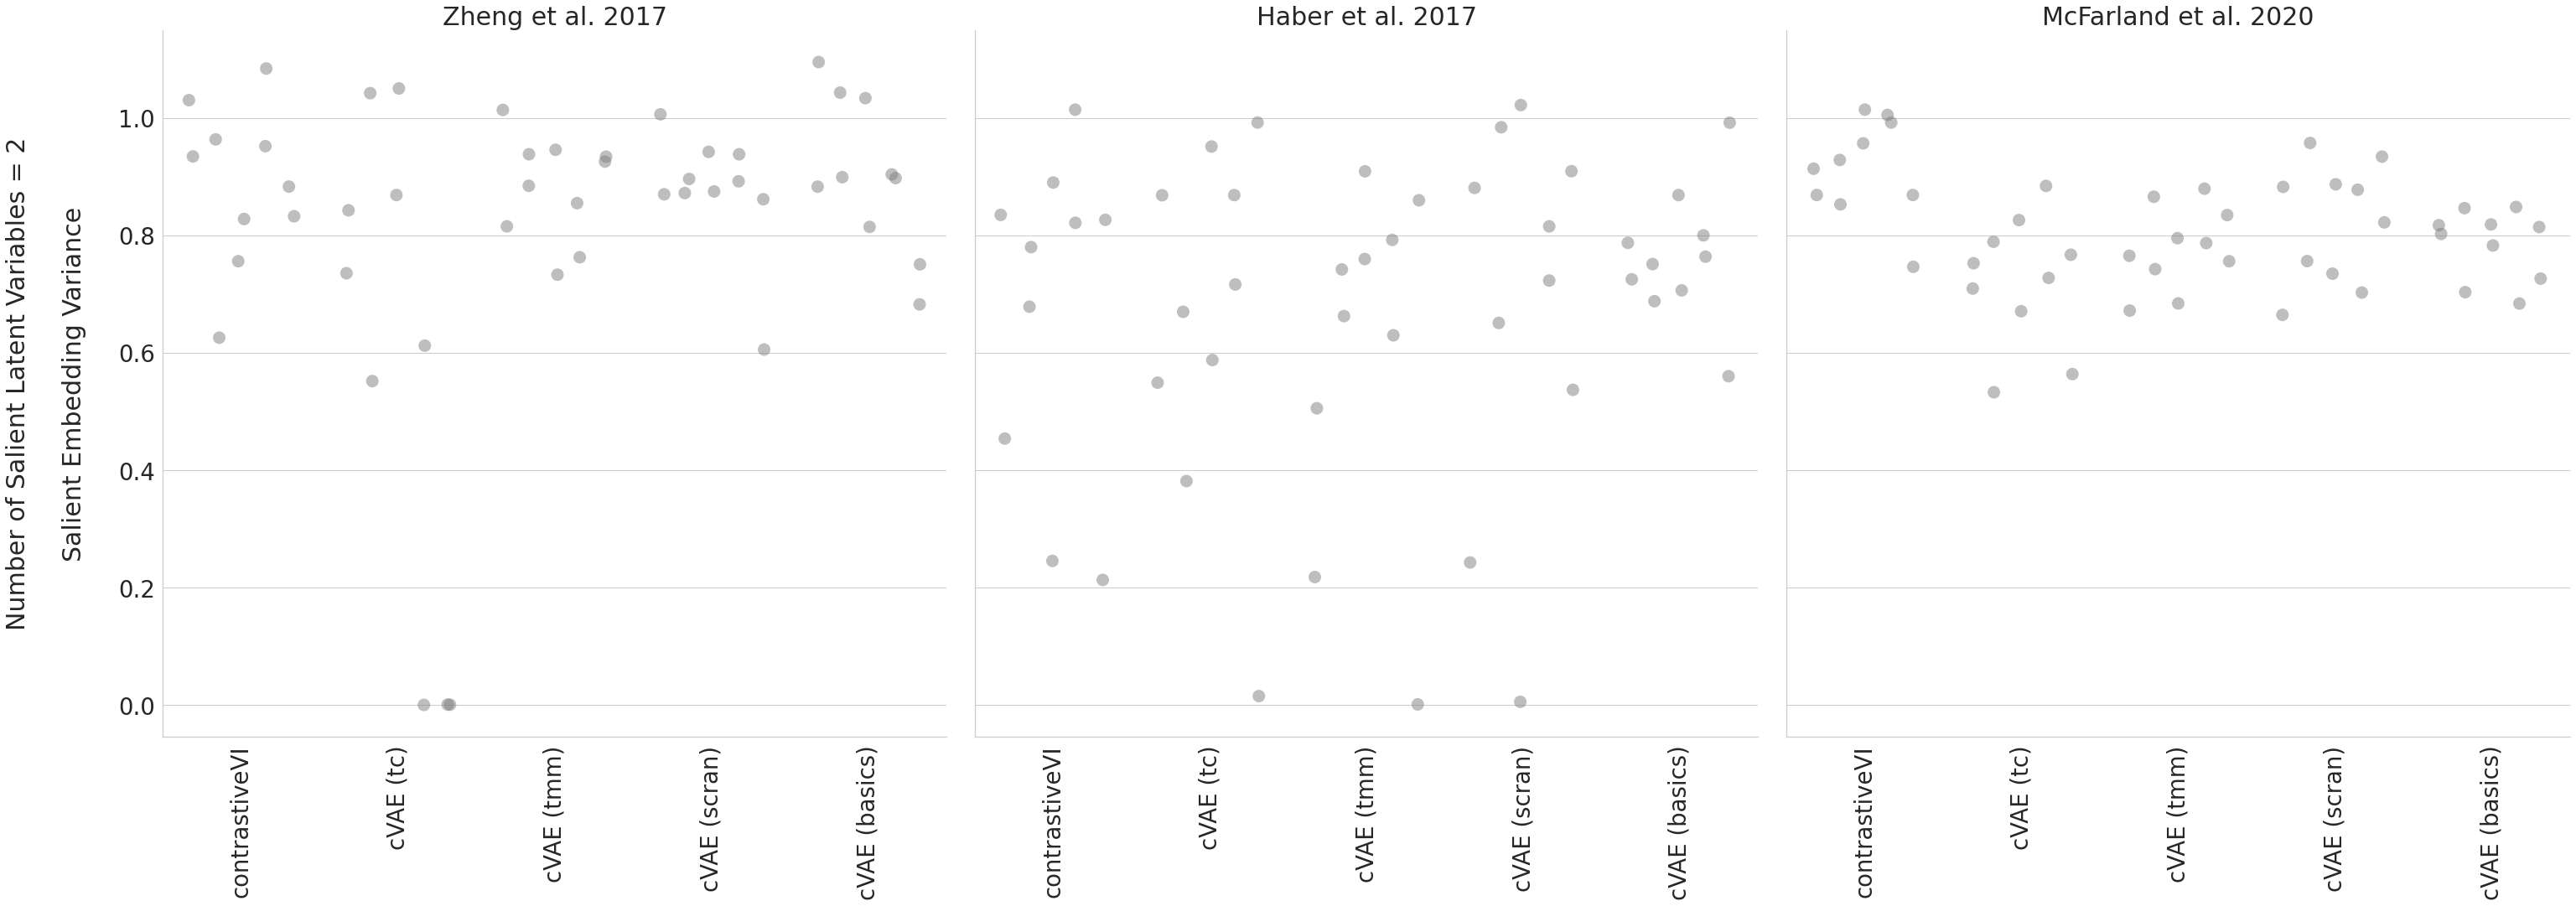

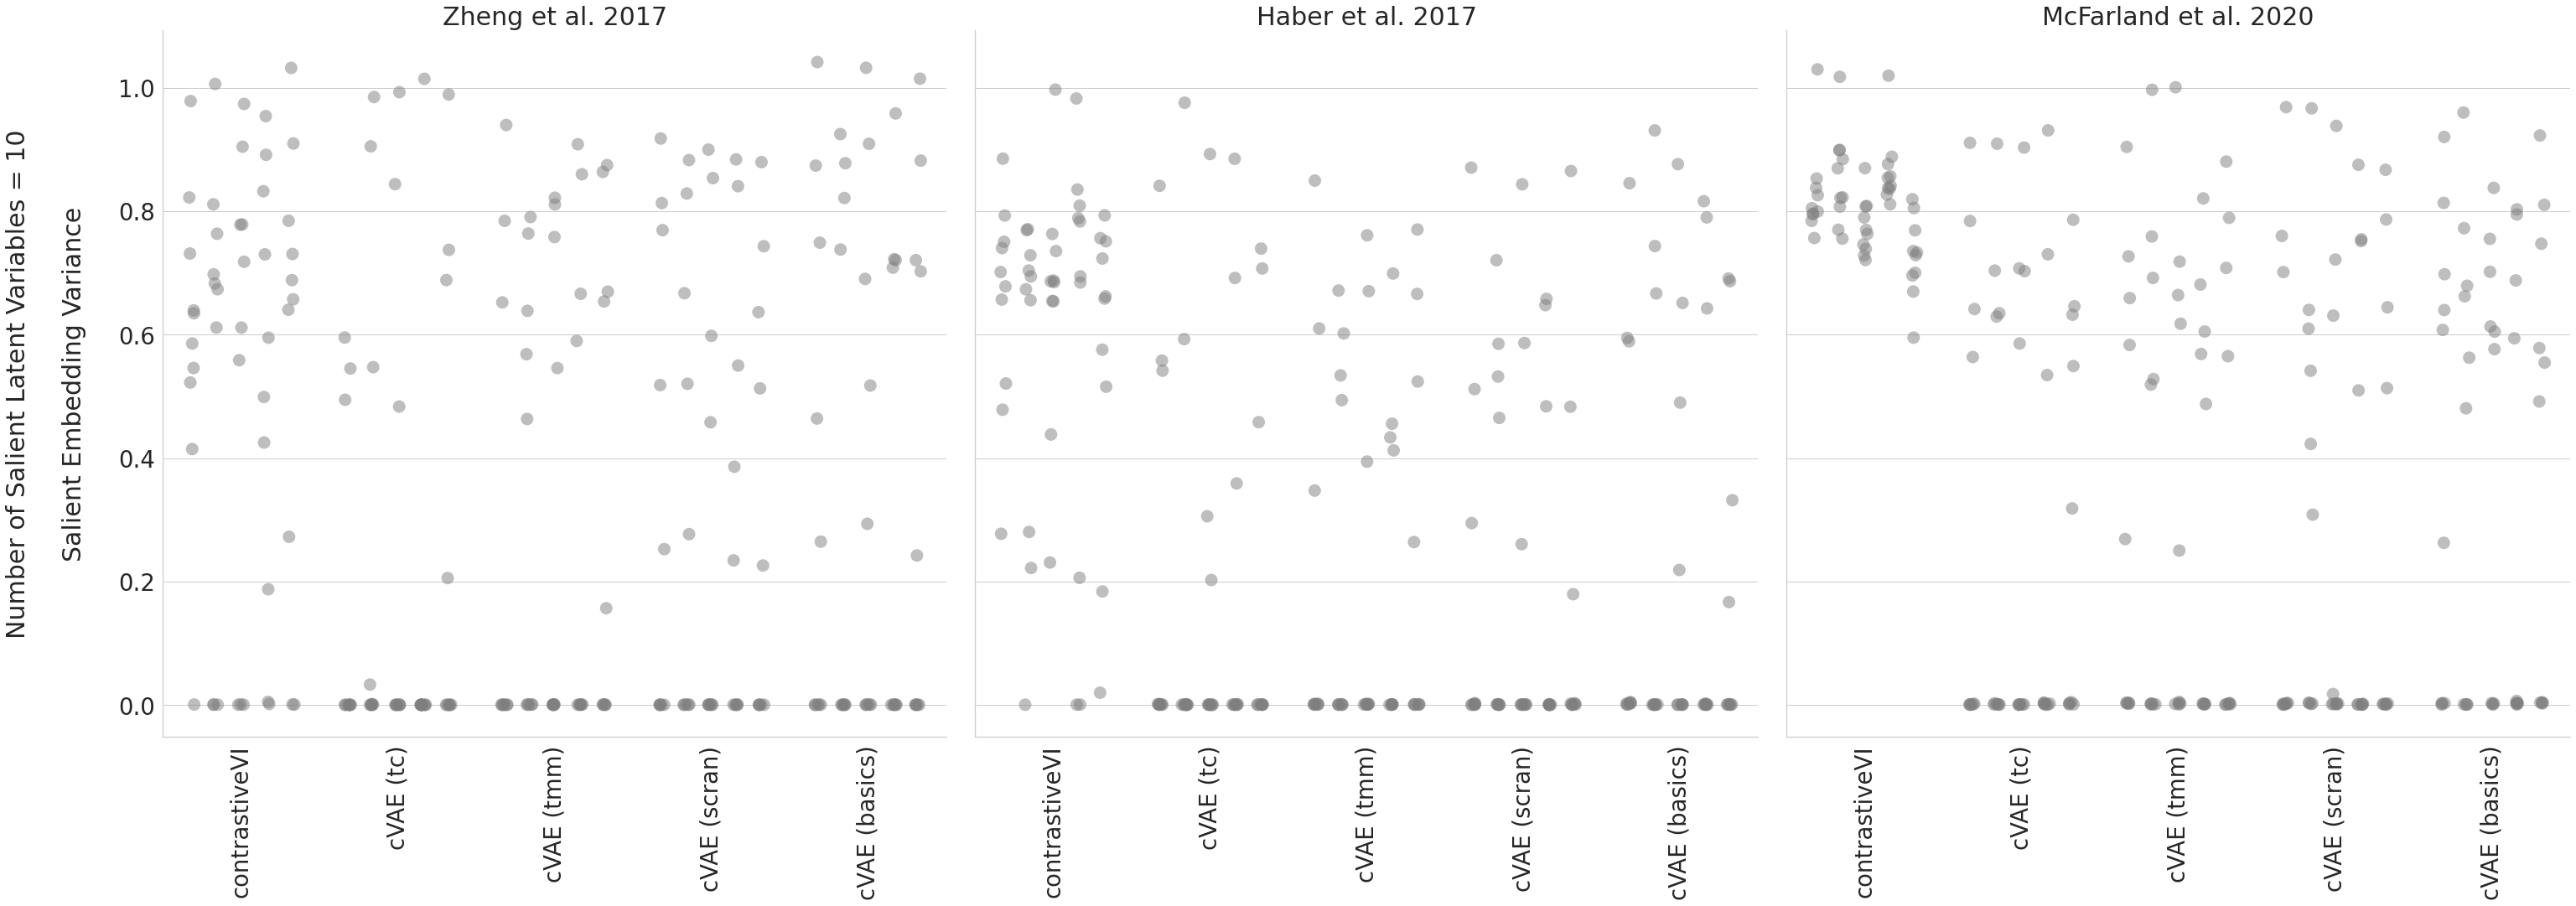

In [8]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
metric = "variance"
representation_type = "salient"

for latent_size in latent_size_list:
    g = sns.FacetGrid(
        melted_inactivity_df[
            (melted_inactivity_df["latent_size"] == latent_size)
            & (melted_inactivity_df["representation_type"] == representation_type)
            & (melted_inactivity_df["metric"] == metric)
        ],
        col="dataset",
        sharey=True,
        sharex=True,
        margin_titles=True,
        height=14,
        aspect=1,
    )
    g.map_dataframe(
        sns.stripplot,
        x="method",
        y="value",
        hue="seed",
        dodge=True,
        palette=sns.color_palette("binary", n_colors=1),
        size=15,
        alpha=0.5,
    )
    g.set_titles(
        col_template="{col_name}",
    )
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(
        "\n",
        (
            f"Number of {representation_type.title()} Latent Variables = {latent_size}"
            f"\n\n{representation_type.title()} Embedding {metric.title()}\n"
        ),
    )

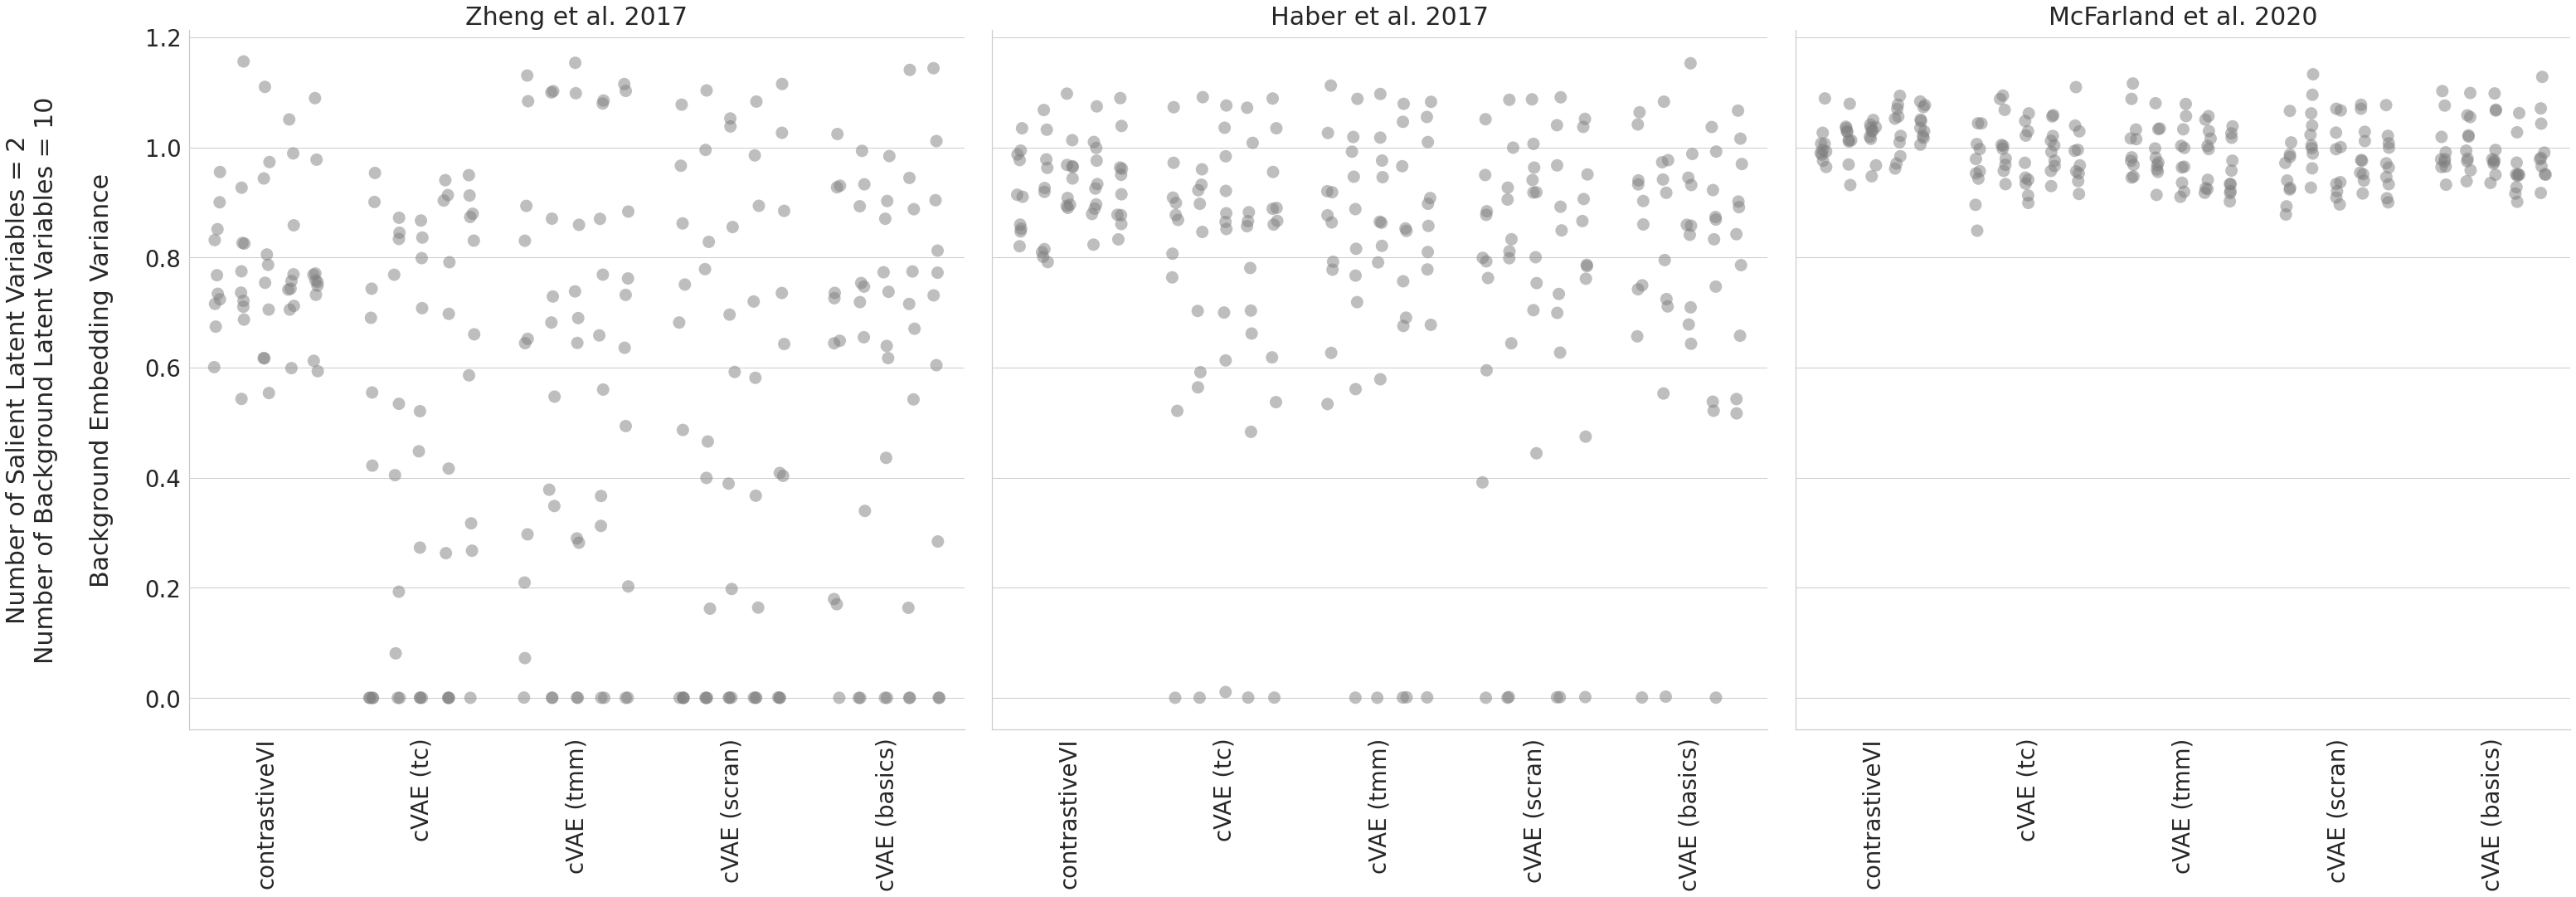

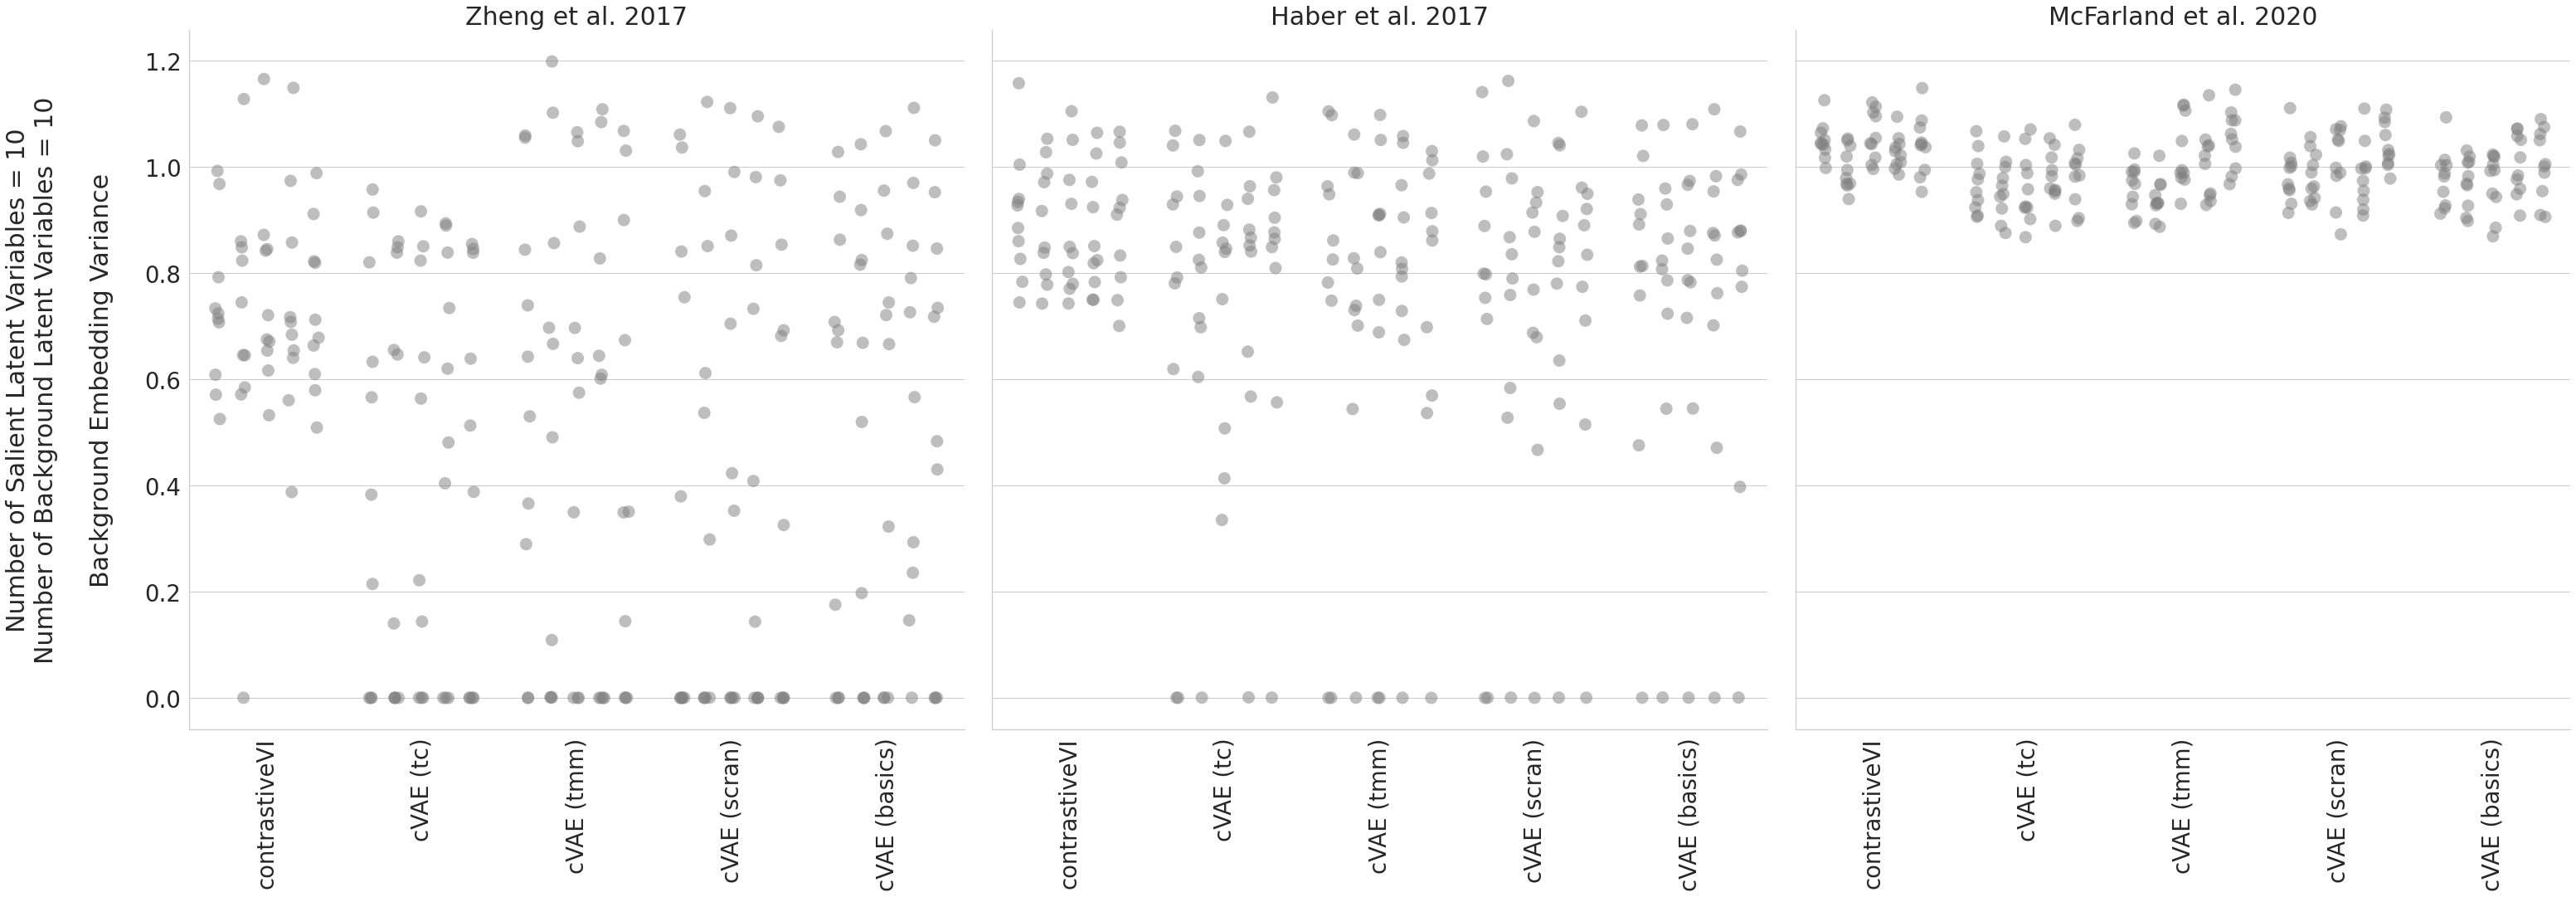

In [9]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
metric = "variance"
representation_type = "background"

for latent_size in latent_size_list:
    g = sns.FacetGrid(
        melted_inactivity_df[
            (melted_inactivity_df["latent_size"] == latent_size)
            & (melted_inactivity_df["representation_type"] == representation_type)
            & (melted_inactivity_df["metric"] == metric)
        ],
        col="dataset",
        sharey=True,
        sharex=True,
        margin_titles=True,
        height=14,
        aspect=1,
    )
    g.map_dataframe(
        sns.stripplot,
        x="method",
        y="value",
        hue="seed",
        dodge=True,
        palette=sns.color_palette("binary", n_colors=1),
        size=15,
        alpha=0.5,
    )
    g.set_titles(
        col_template="{col_name}",
    )
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(
        "\n",
        (
            f"Number of Salient Latent Variables = {latent_size}"
            "\nNumber of Background Latent Variables = 10"
            f"\n\n{representation_type.title()} Embedding {metric.title()}\n"
        ),
    )

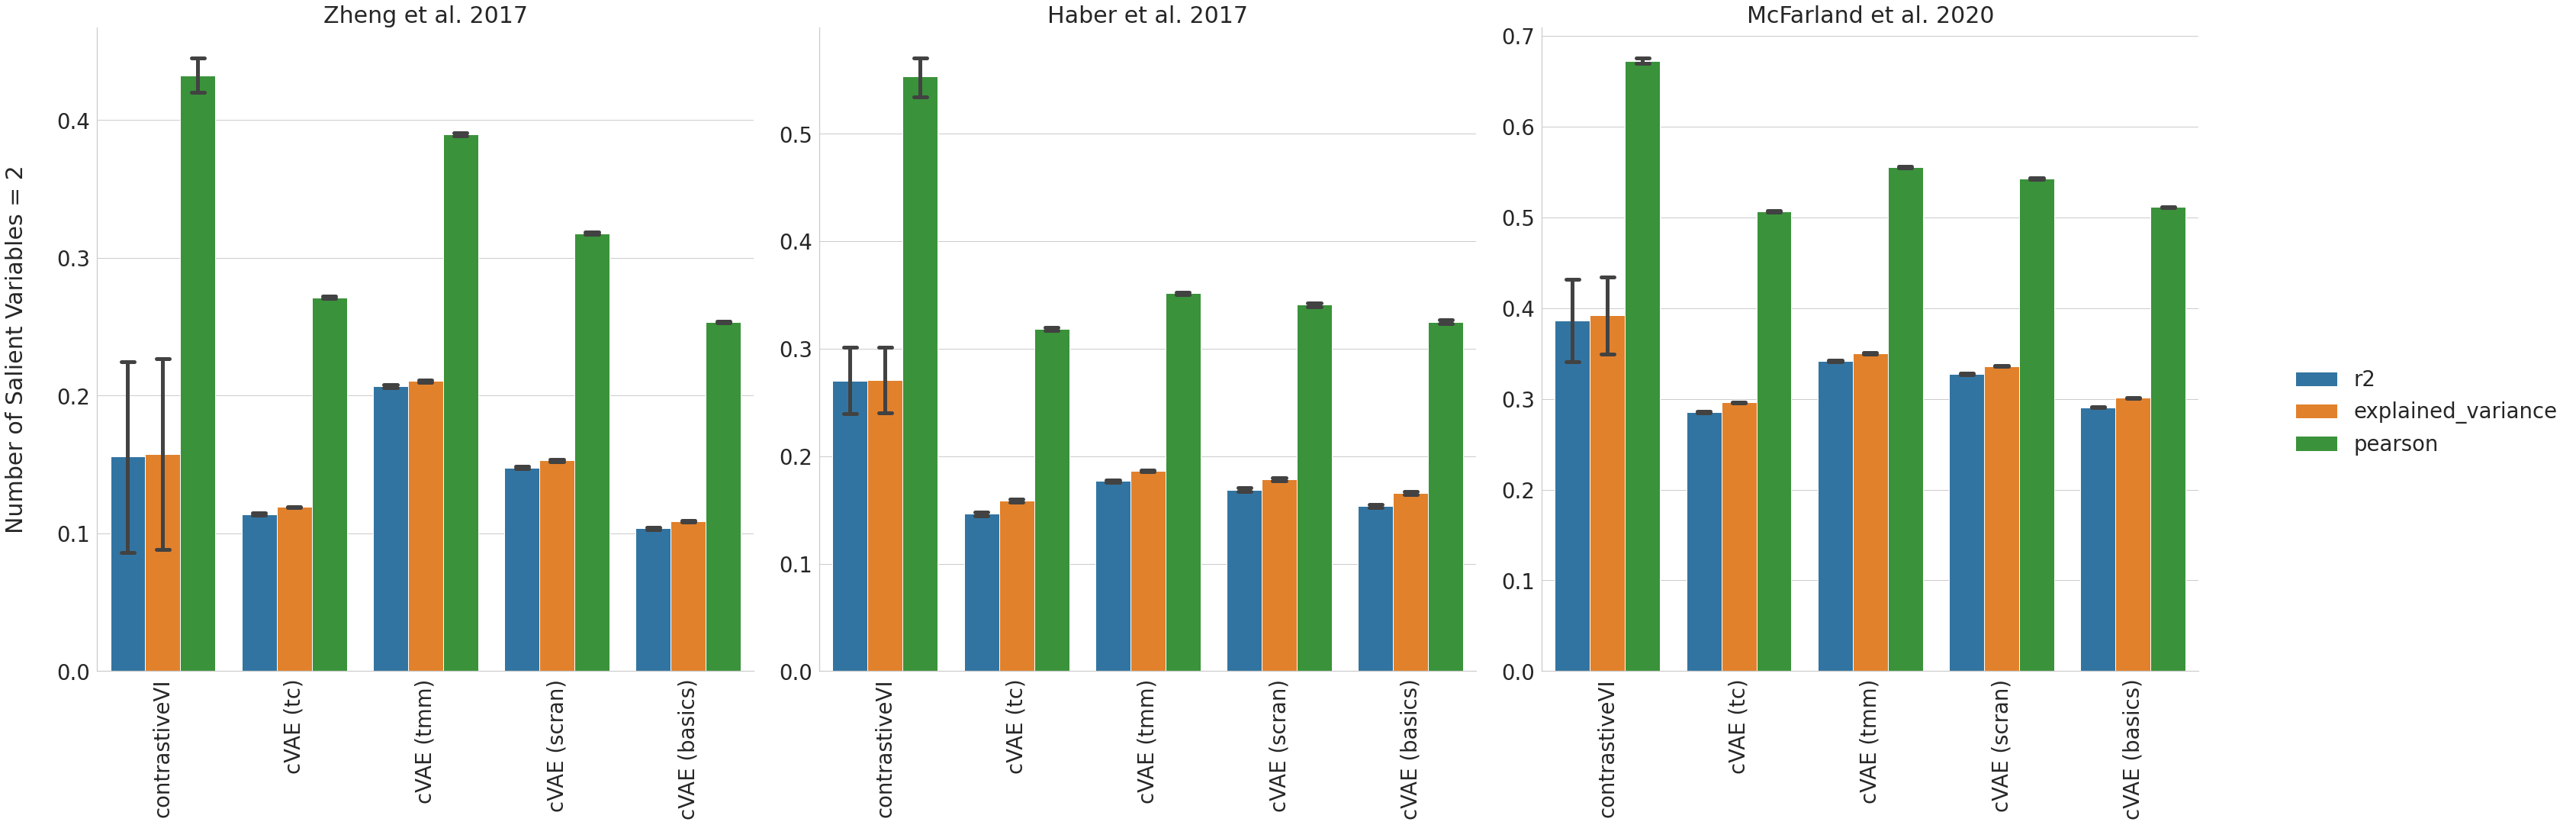

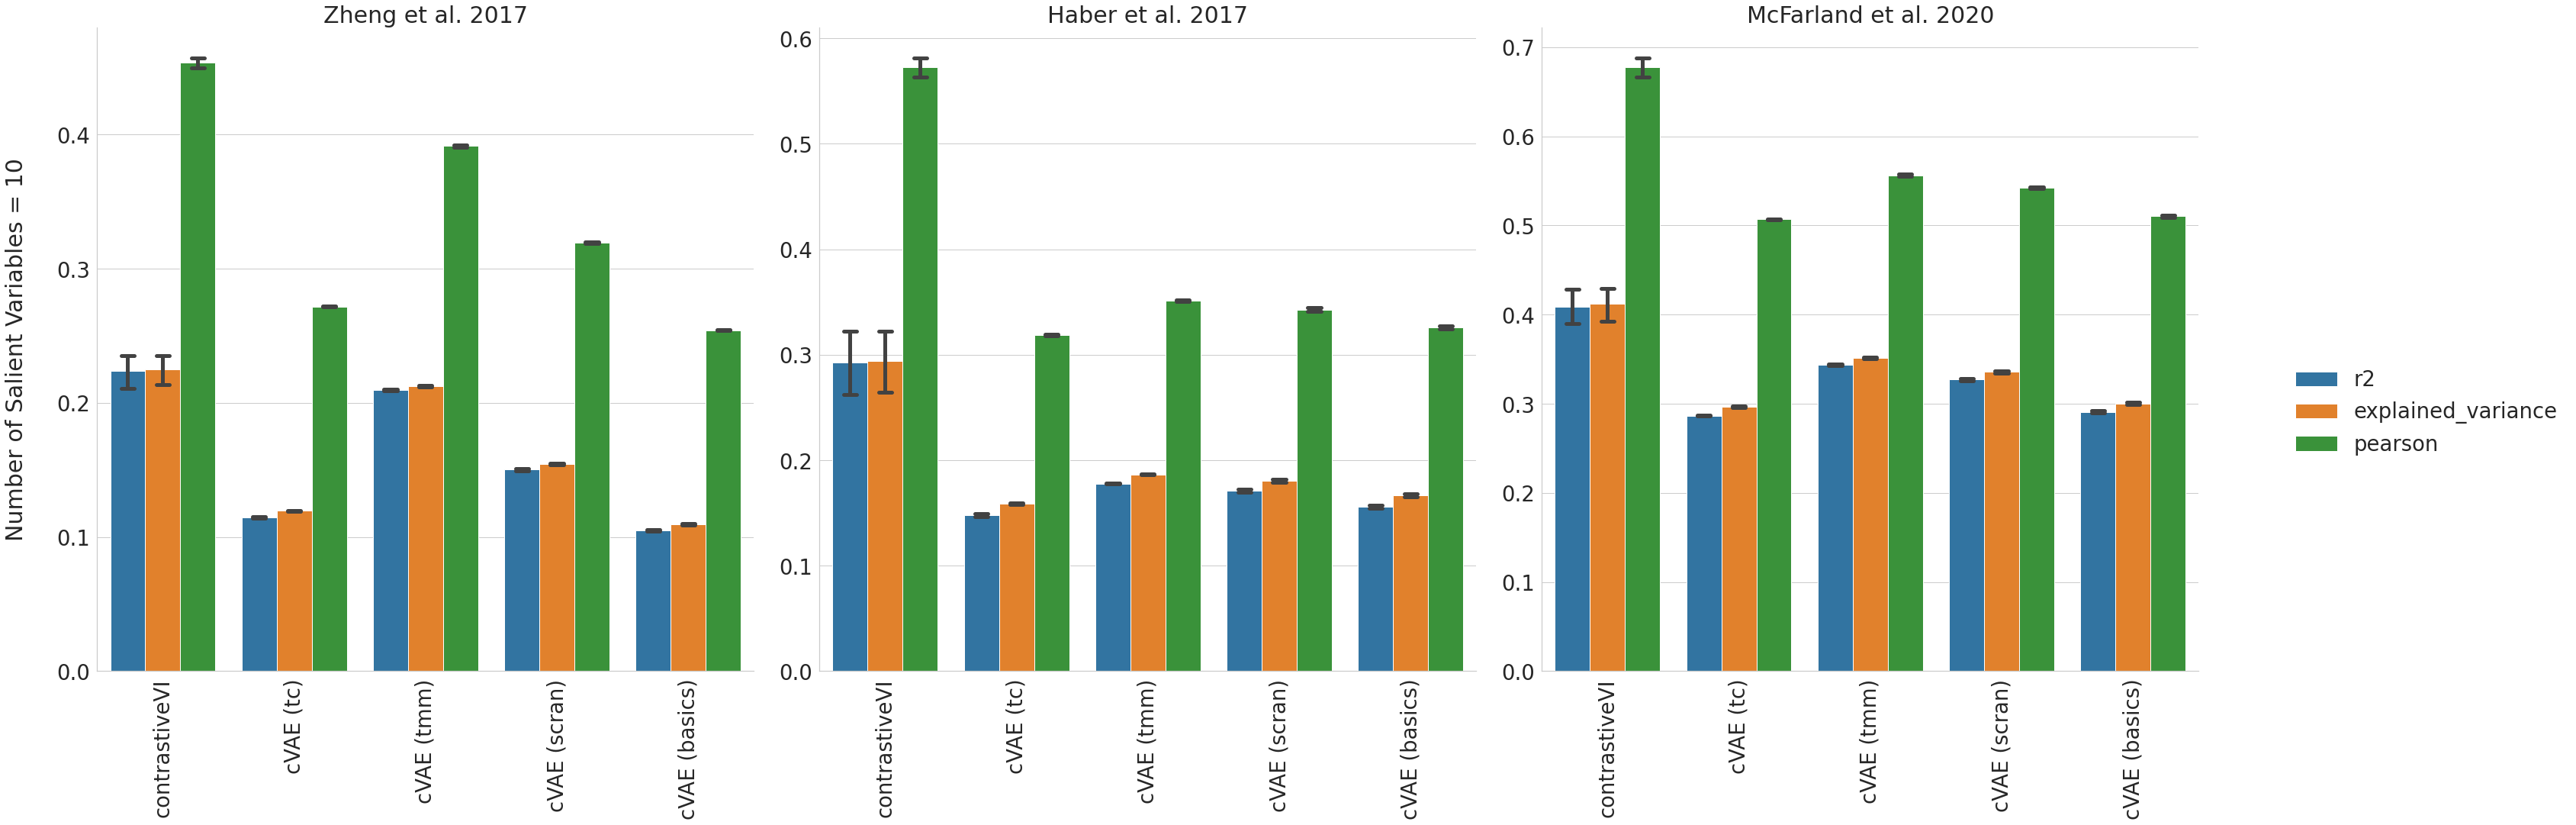

In [10]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")

for latent_size in latent_size_list:
    g = sns.FacetGrid(
        melted_recon_df[melted_recon_df["latent_size"] == latent_size],
        col="dataset",
        sharey=False,
        sharex=True,
        margin_titles=True,
        height=14,
        aspect=1,
    )
    g.map_dataframe(
        sns.barplot,
        x="method",
        y="value",
        hue="metric",
        ci=68.2,
        errwidth=5,
        capsize=0.10,
        palette=sns.color_palette("tab10"),
    )
    g.set_titles(
        col_template="{col_name}",
    )
    g.set_xticklabels(rotation=90)
    g.set_axis_labels("\n", f"Number of Salient Variables = {latent_size}\n")
    g.add_legend()

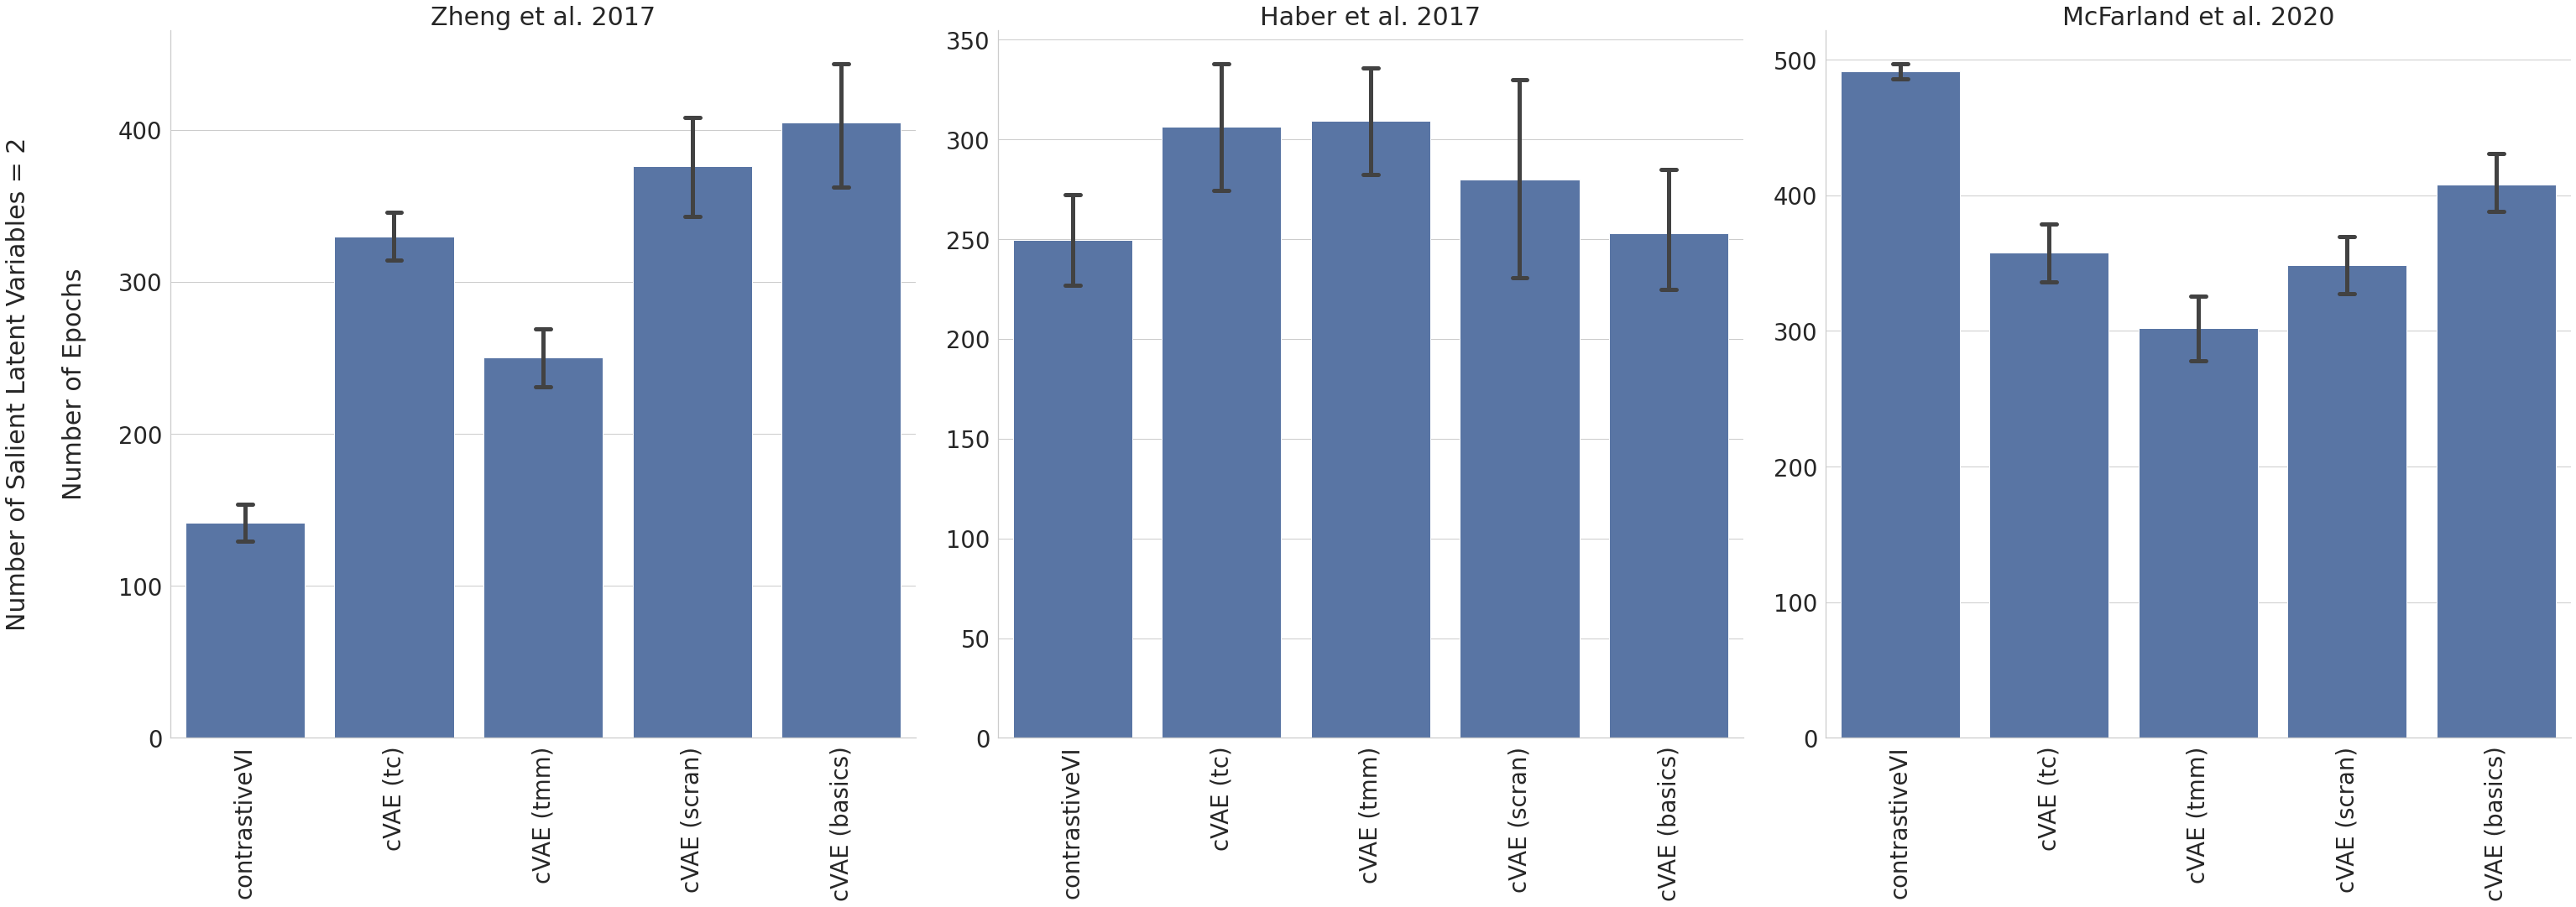

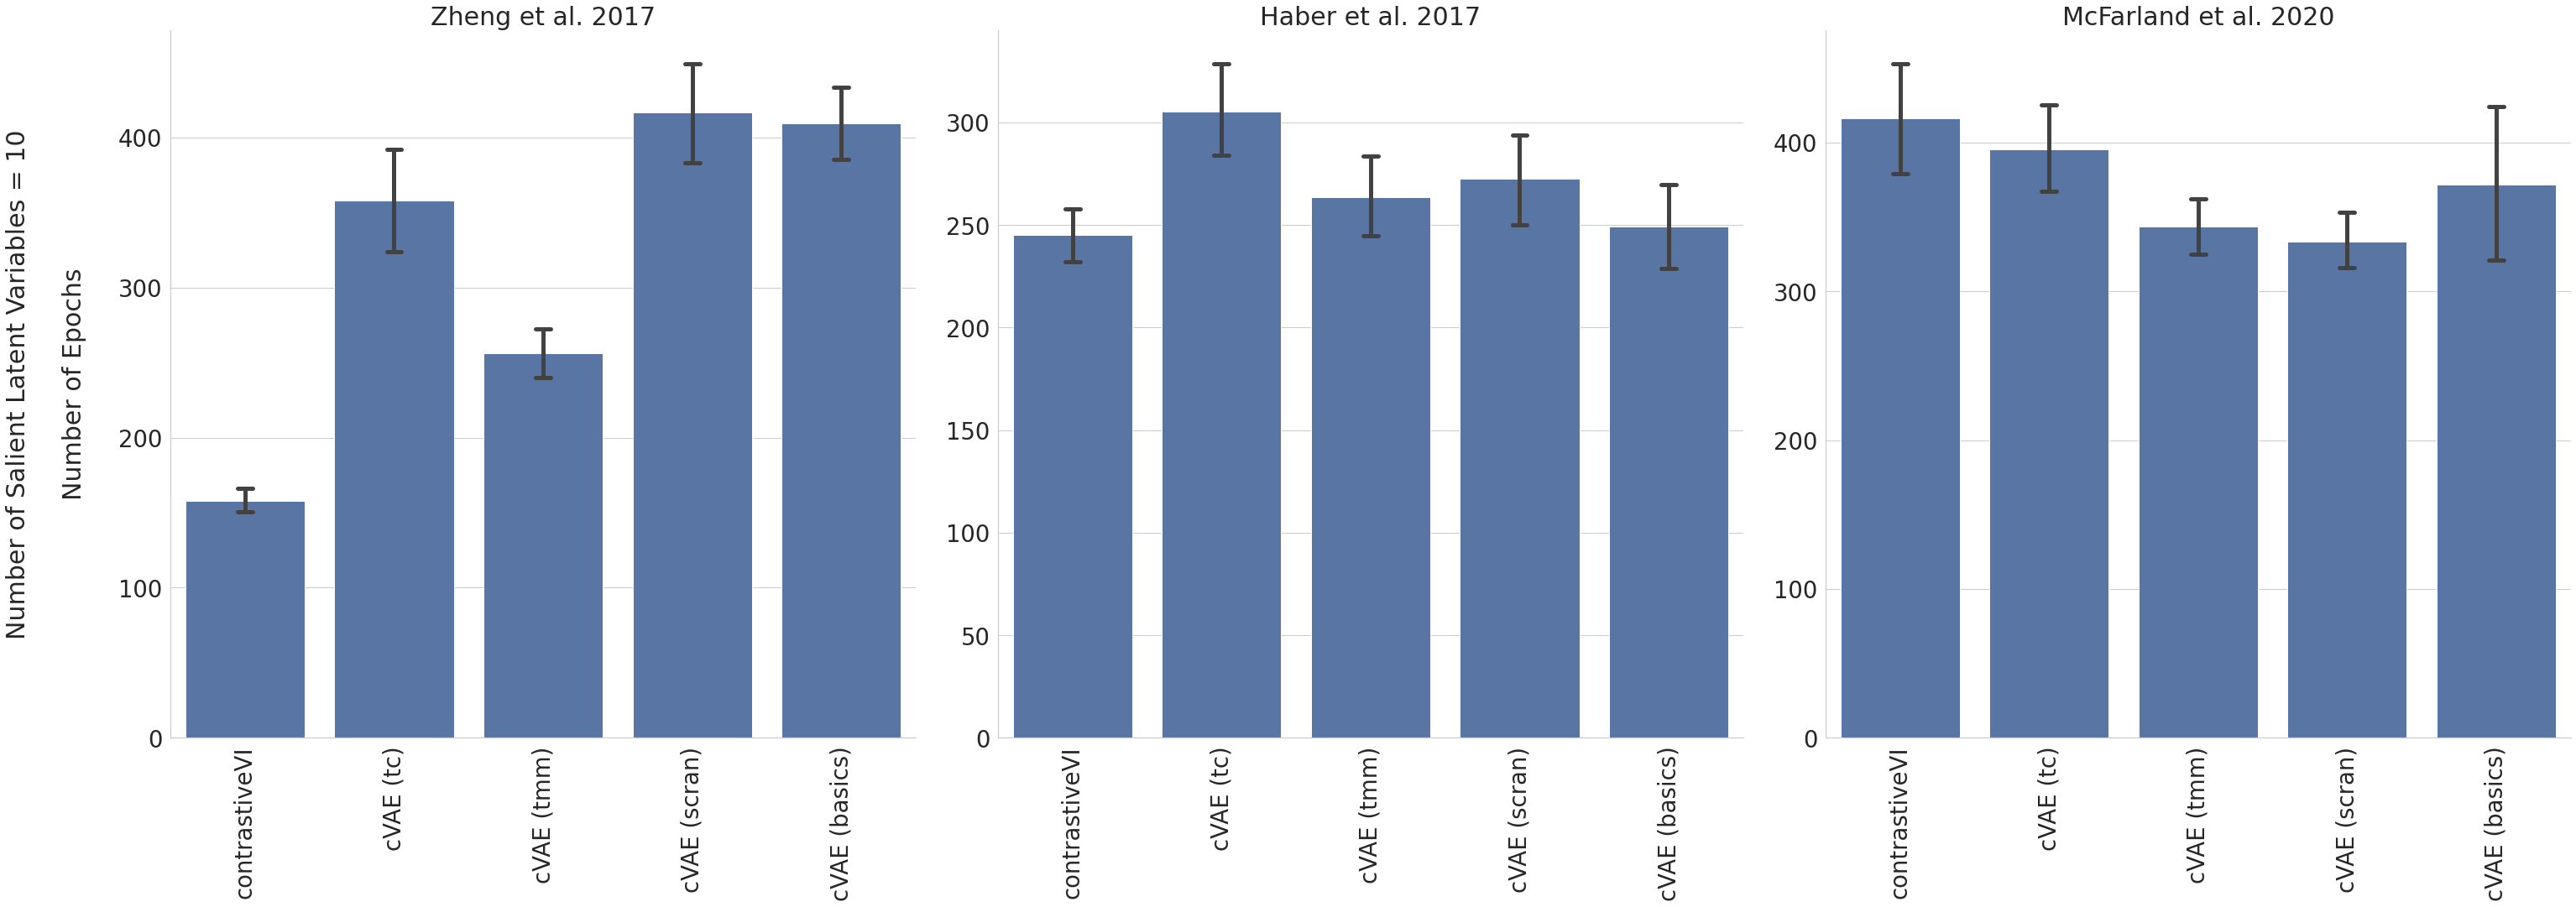

In [11]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")

for latent_size in latent_size_list:
    g = sns.FacetGrid(
        recon_df[recon_df["latent_size"] == latent_size],
        col="dataset",
        sharey=False,
        sharex=True,
        margin_titles=True,
        height=14,
        aspect=1,
    )
    g.map_dataframe(
        sns.barplot,
        x="method",
        y="num_epochs",
        ci=68.2,
        errwidth=5,
        capsize=0.10,
    )
    g.set_titles(
        col_template="{col_name}",
    )
    g.set_xticklabels(rotation=90)
    g.set_axis_labels("\n", f"Number of Salient Latent Variables = {latent_size}\n\nNumber of Epochs\n")